## Netflix EDA
- netflix의 컨텐츠 데이터를 활용하여 EDA를 수행하였습니다.

In [2]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
sns.set()
sns.set_style("white")

### 1: 데이터 불러오기
- 컨텐츠의 등급데이터는 아래의 코드 사용
```
ratings_ages = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                  'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                  'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                  'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}
```

In [4]:
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df.tail(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
neflix_df_2020 = pd.read_csv("datas/netflix_point_2020.csv")
neflix_df_2021 = pd.read_csv("datas/netflix_point_2021.csv")

### 2 : 결측데이터 확인
- director, cast, country, date_added, rating 컬럼에 결측 데이터가 있는것을 확인하였습니다.

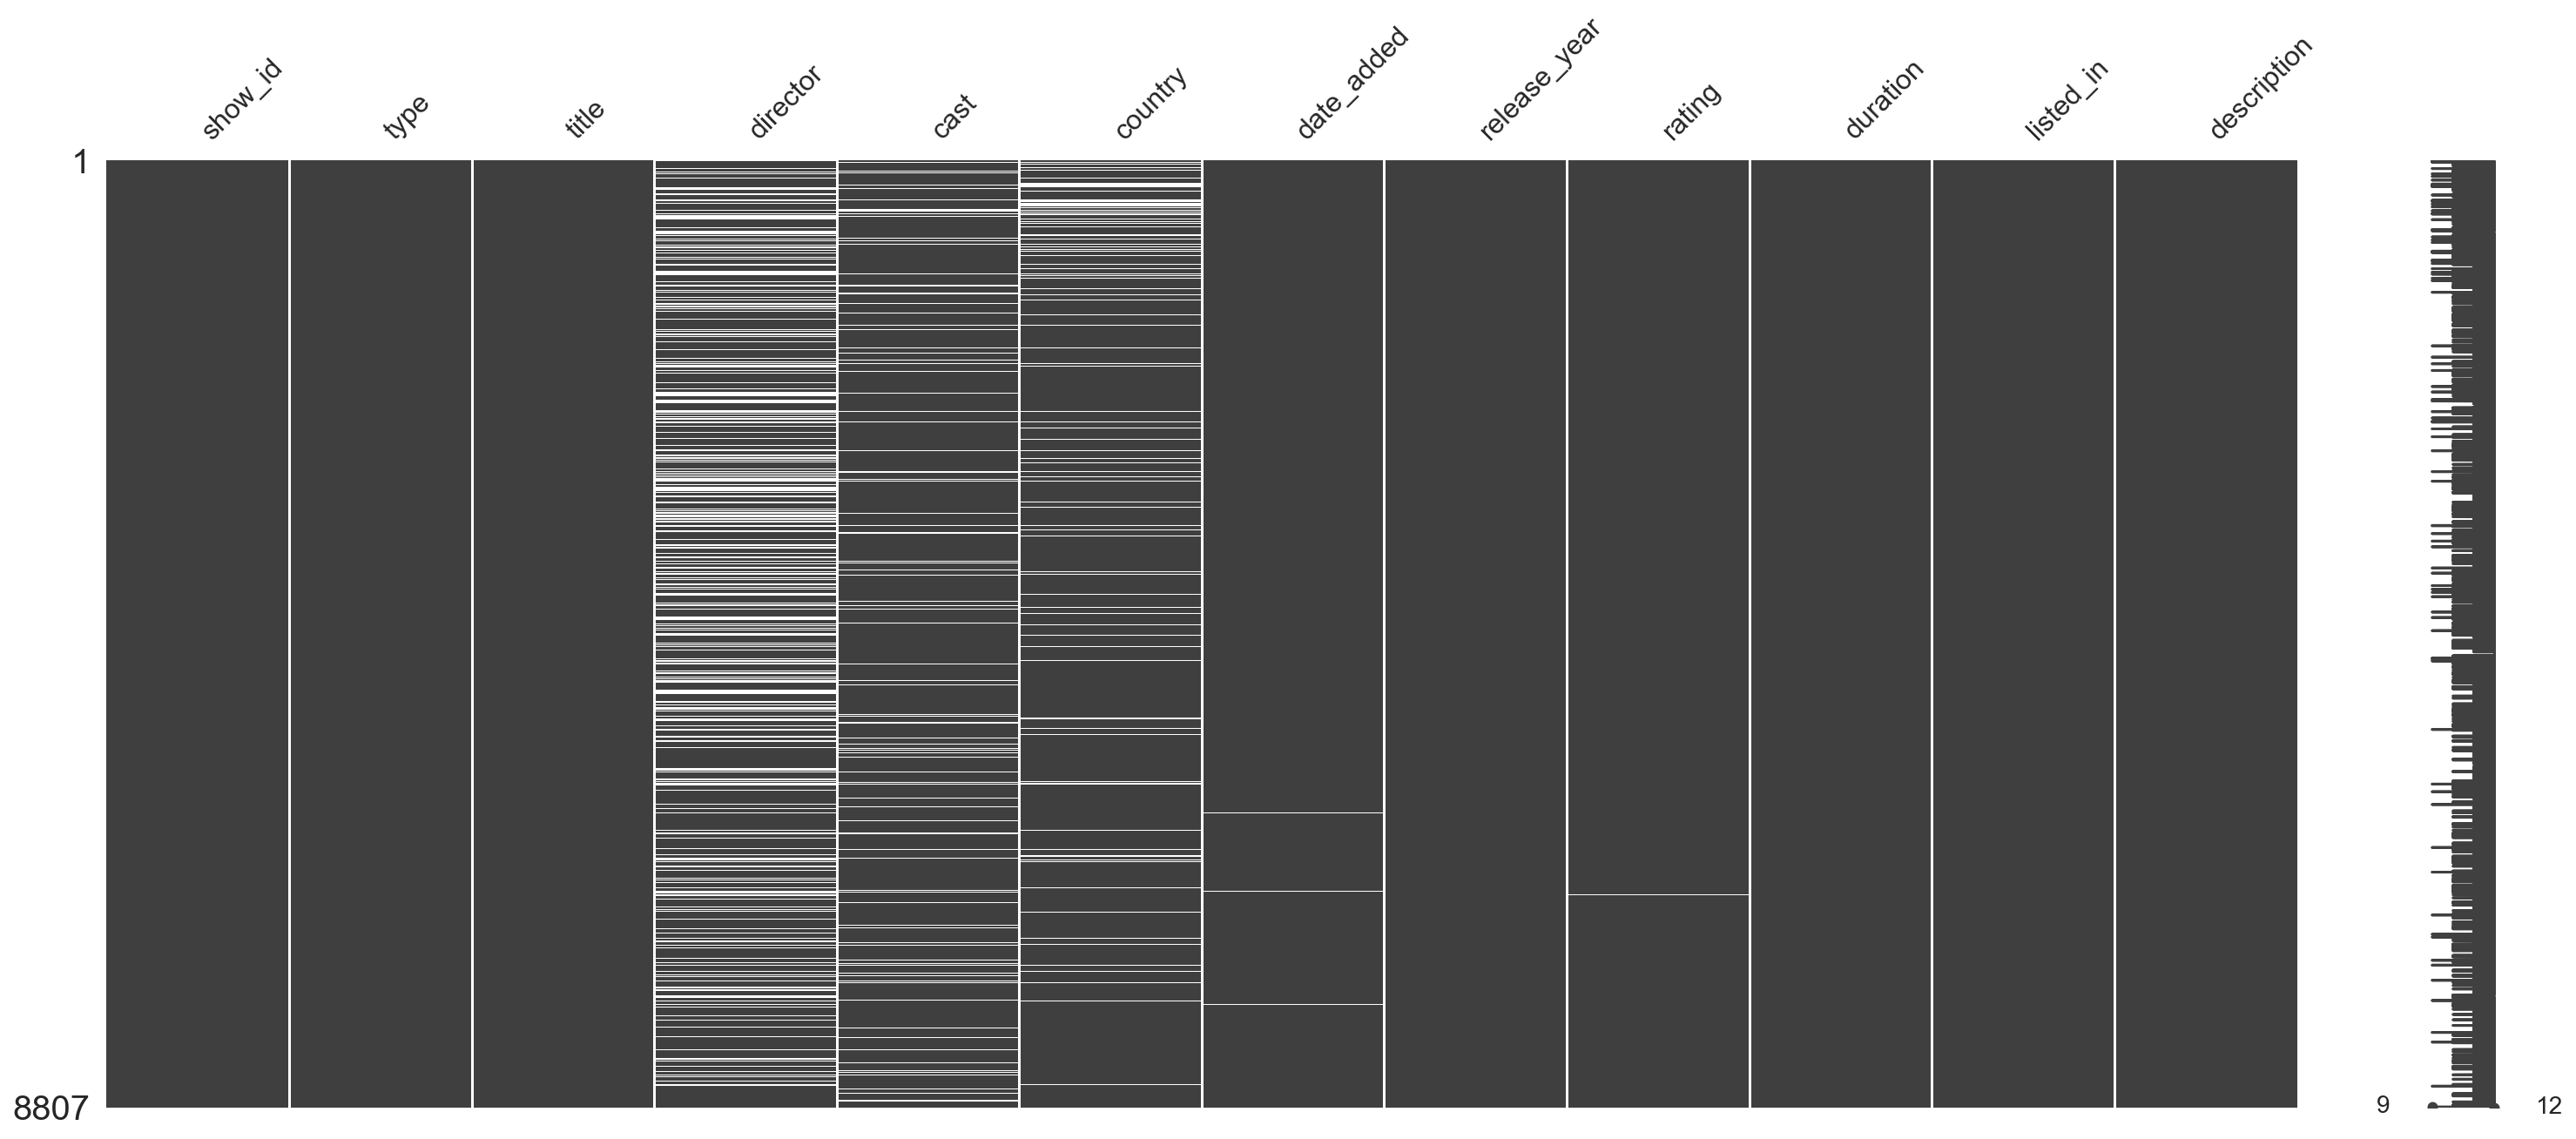

In [5]:
msno.matrix(netflix_df)
plt.show()

In [5]:
# 컬럼별 결측 데이터수
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### 3: 데이터 전처리
- EDA 사용할 컬럼 : type, title, country, duration, date_added, rating, release_year
- 결측 데이터 제거
- date_added > year_added, month_added
- rating > Kids,  Kids, Teens, Adults


In [6]:
# EDA에서 사용할 컬럼만 필터링
columns = ["type", "title", "country", "duration", "date_added", "rating", "release_year"]
netflix_df = netflix_df[columns]

In [7]:
# 결측데이터 제거
netflix_df = netflix_df.dropna()

In [8]:
netflix_df.tail(1)

,type,title,country,duration,date_added,rating,release_year
8806,Movie,Zubaan,India,111 min,"March 2, 2019",TV-14,2015


In [9]:
# date_added(넷플릭스 출시일) 데이터를 year_added(출시년도)와 month_added(출시월) 컬럼 추가
netflix_df['year_added'] = netflix_df['date_added'].apply(lambda date: str(date).split(" ")[-1])
netflix_df['month_added'] = netflix_df['date_added'].apply(lambda date: str(date).split(" ")[0])

In [10]:
# rating 컬럼의 컨텐츠 등급을 4개의 등급으로 변경해서 컬럼 추가
ratings_ages = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids',
                'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids',
                'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids',
                'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}
netflix_df['target_age'] = netflix_df['rating'].replace(ratings_ages)

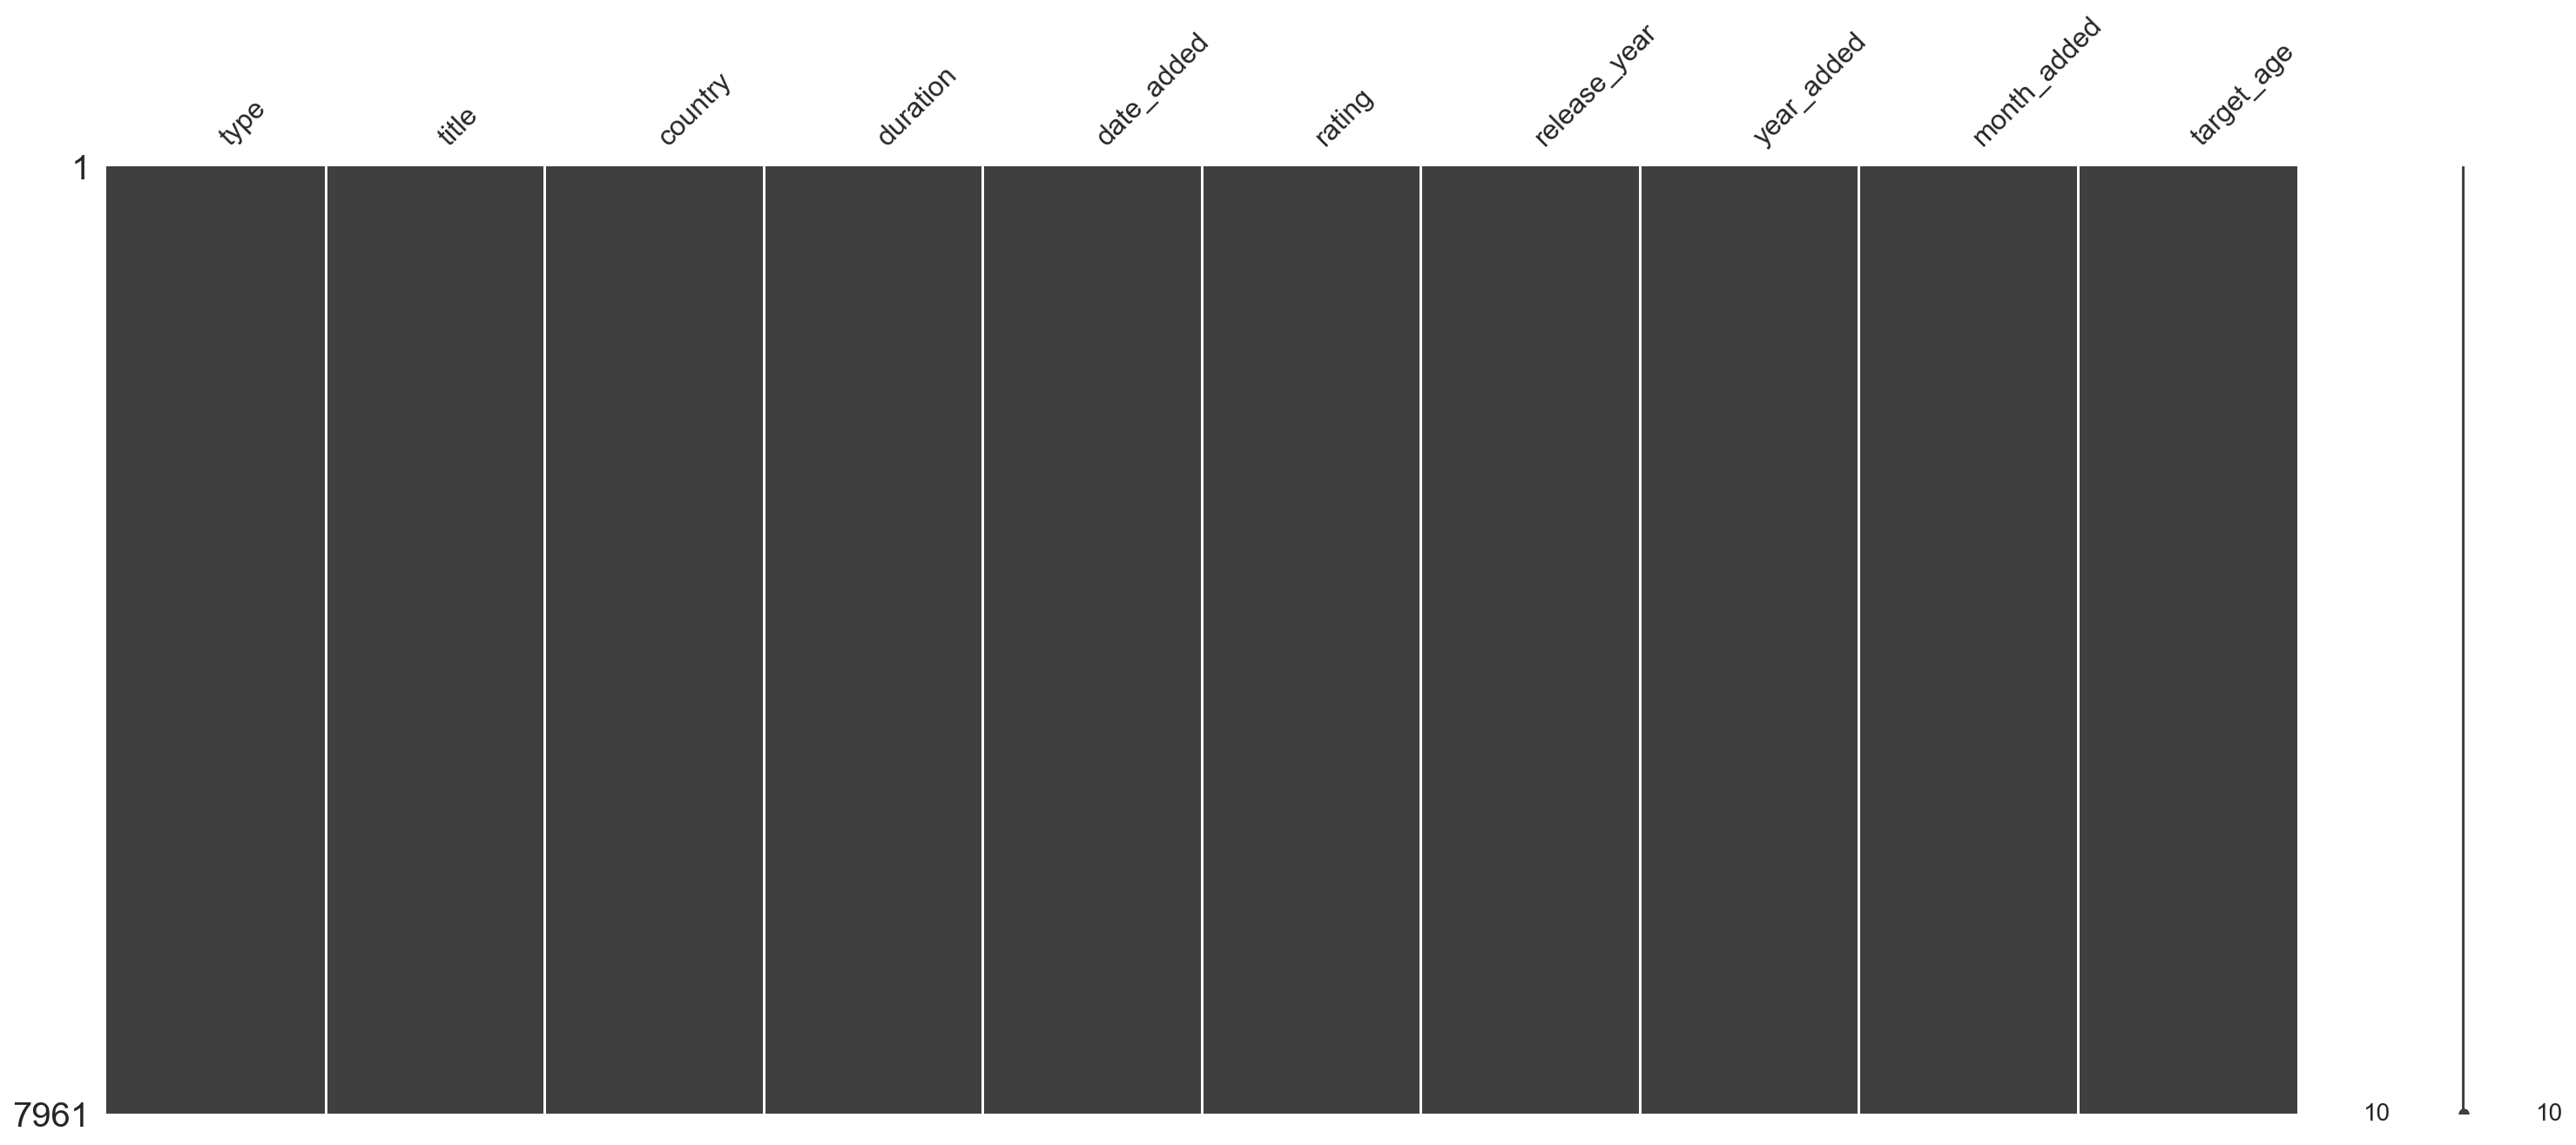

In [13]:
msno.matrix(netflix_df)
plt.show()

In [12]:
netflix_df.tail(2)

,type,title,country,duration,date_added,rating,release_year,year_added,month_added,target_age
8805,Movie,Zoom,United States,88 min,"January 11, 2020",PG,2006,2020,January,Older Kids
8806,Movie,Zubaan,India,111 min,"March 2, 2019",TV-14,2015,2019,March,Teens


### 4: 데이터 탐색 : EDA

#### 영화와 TV쇼의 비율

In [11]:
type_count = netflix_df["type"].value_counts()
type_count

Movie      5687
TV Show    2274
Name: type, dtype: int64

In [15]:
type_count.index

Index(['Movie', 'TV Show'], dtype='object')

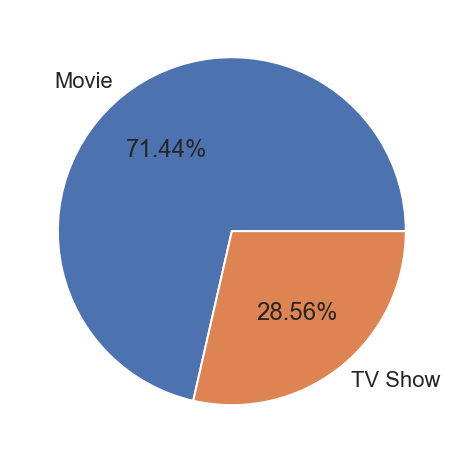

In [16]:
plt.pie(type_count.values, labels=type_count.index, autopct="%1.2f%%")
plt.show()

결론 : Movie가 TV Show 보다 7:3 비율의 정도로 더 많은 컨텐츠가 있다.

#### 년도별 영화와 TV쇼 컨텐츠 갯수의 추세

In [17]:
pivot_df = netflix_df.pivot_table("country", "type", "year_added", aggfunc=len, fill_value=0)
pivot_df

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,19,54,242,812,1192,1349,1223,770
TV Show,1,0,0,0,0,5,5,25,165,309,337,509,548,370


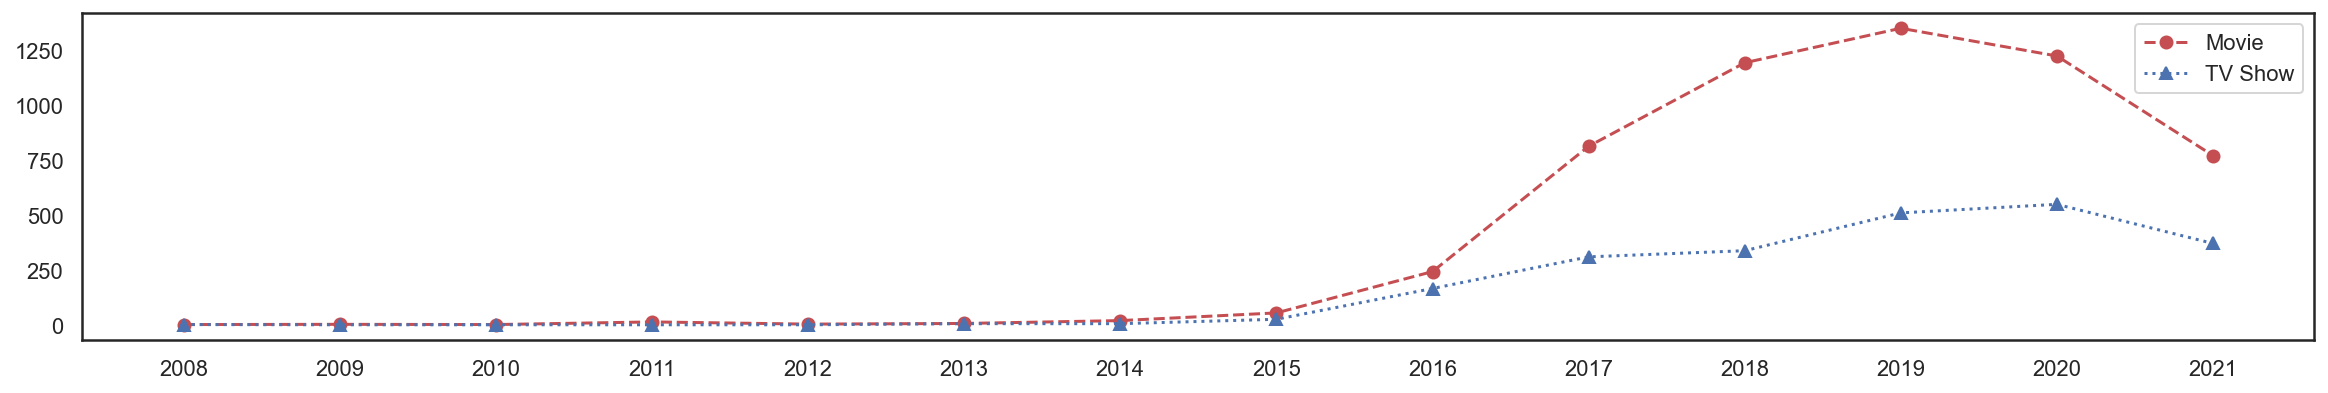

In [18]:
plt.figure(figsize=(20, 3))
plt.plot(pivot_df.columns, pivot_df.loc["Movie"], "ro--", label="Movie")
plt.plot(pivot_df.columns, pivot_df.loc["TV Show"], "b^:", label="TV Show")
plt.legend()
plt.show()

결론 : 영화의 컨텐츠가 TV쇼의 컨텐츠보다 더 많지만 추세적으로는 최근에 영화보다 TV쇼의 상승률이더 높다. 2019년을 기점으로 OTT 시장이 활성화되면서 자사의 컨텐츠를 넷플릭스로부터 가져간것 같다.

#### 국가별 컨텐츠 제작수
- 가설 : 넷플릭스는 미국 서비스이기 때문에 미국에서 제작된 컨텐츠가 가장 많을 것이다.
- 상위 8개 국가

In [13]:
country_count_df = netflix_df["country"].value_counts()
country_count_df = country_count_df.reset_index().loc[:8]
print(country_count_df)
country_count_df = country_count_df.rename(columns={"index": "country", "country": "count"})
country_count_df

            index  country
0   United States     2809
1           India      972
2  United Kingdom      418
3           Japan      243
4     South Korea      199
5          Canada      181
6           Spain      145
7          France      124
8          Mexico      110


,country,count
0,United States,2809
1,India,972
2,United Kingdom,418
3,Japan,243
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110


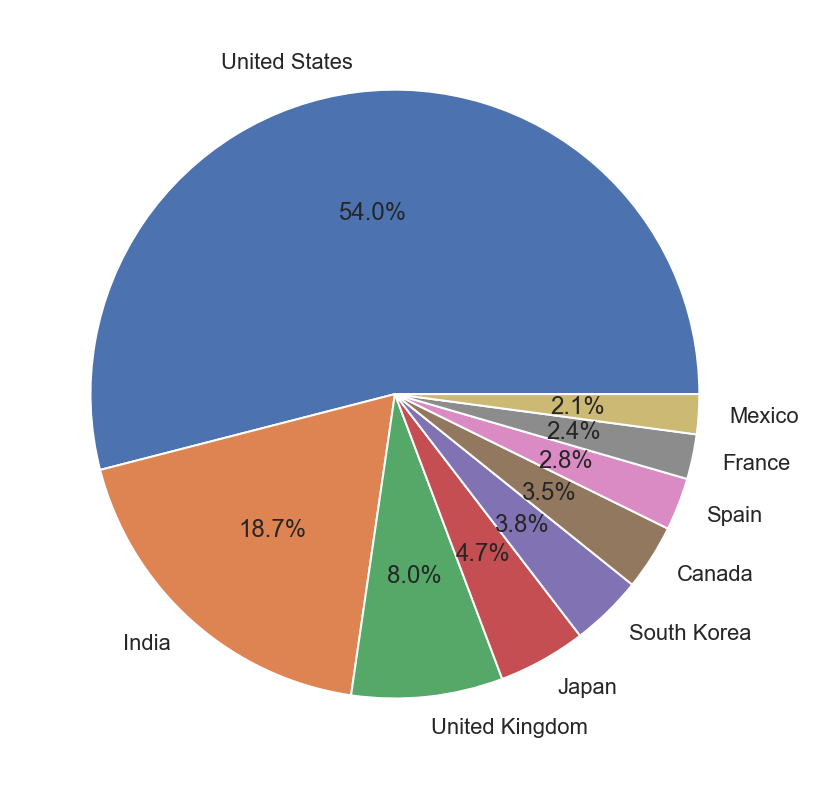

In [20]:
plt.figure(figsize=(7, 7))
plt.pie(country_count_df["count"].values, labels=country_count_df["country"].values,
        autopct="%1.1f%%")
plt.show()

결론 : 국가별 미국, 인도, 영국, 일본, 한국 순으로 컨텐츠수가 많고 미국이 컨텐츠 강국이고 넷플릭스가 미국 서비스이다 보니 미국의 컨텐츠가 가장 많이 서비스 되고 있는것으로 보입니다. 인도도 볼리우드라고 불리우는 영화산업이 뭄바이에서 활발하게 제작되고 있습니다.

#### 컨텐츠 타입과 컨텐츠 등급별 컨텐츠의 비율

In [15]:
movie_df = netflix_df[netflix_df["type"] == "Movie"]
tv_df = netflix_df[netflix_df["type"] == "TV Show"]

In [16]:
movie_count = movie_df["target_age"].value_counts()
tv_count = tv_df["target_age"].value_counts()
print(tv_count)

Adults        1010
Teens          620
Older Kids     420
Kids           224
Name: target_age, dtype: int64


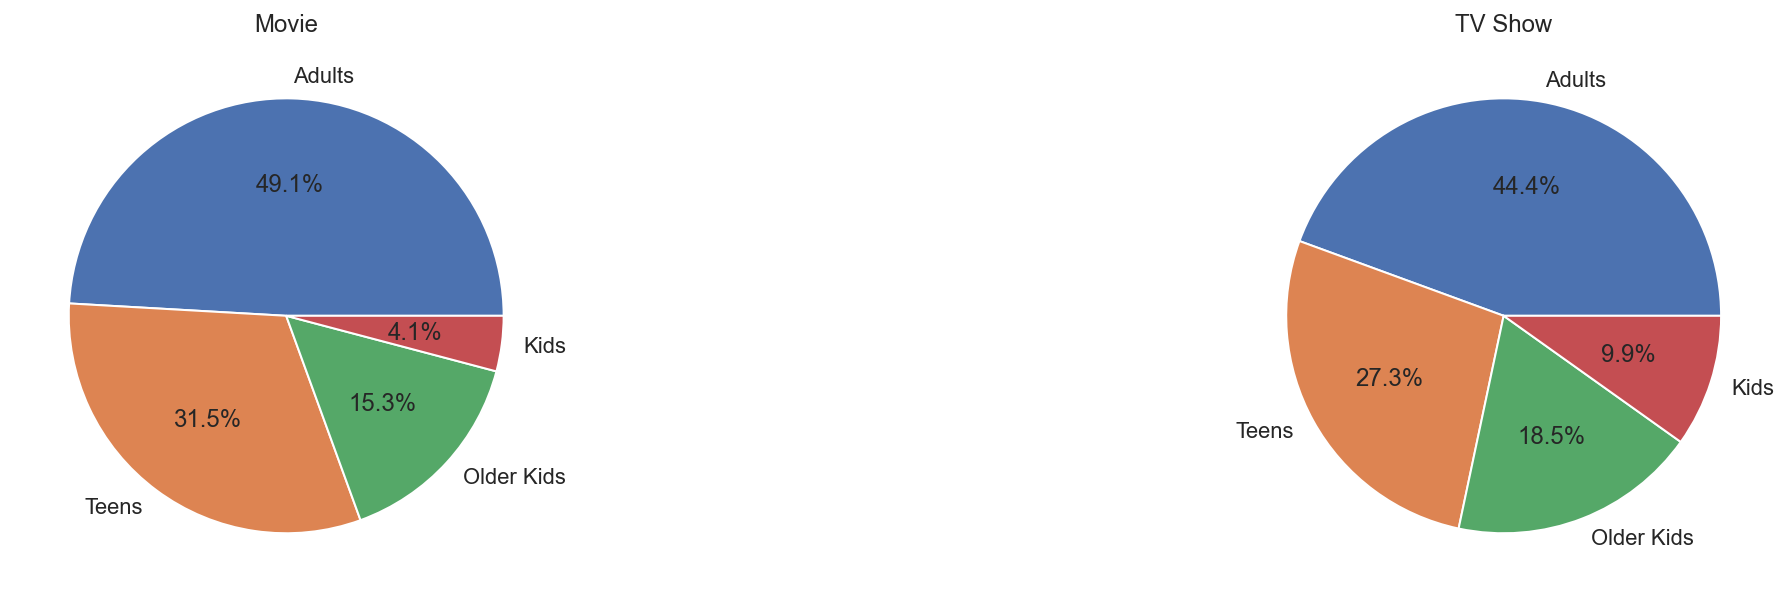

In [23]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.title("Movie")
plt.pie(movie_count.values, labels=movie_count.index, autopct="%1.1f%%")

plt.subplot(122)
plt.title("TV Show")
plt.pie(tv_count.values, labels=tv_count.index, autopct="%1.1f%%")

plt.show()

결론 : 영화가 TV쇼 보다 청소년 관람불가 등급의 비율이 더 높고 TV가 영화보다 청소년관람등급의 컨텐츠의 비율이 더 높습니다.

#### 영화 러닝 타임의 분포

In [24]:
movie_df = netflix_df[netflix_df["type"] == "Movie"]
movie_df = movie_df.reset_index(drop=True)
movie_df["running_time"] = movie_df["duration"].apply(lambda data: data.split(" ")[0]).astype("int")

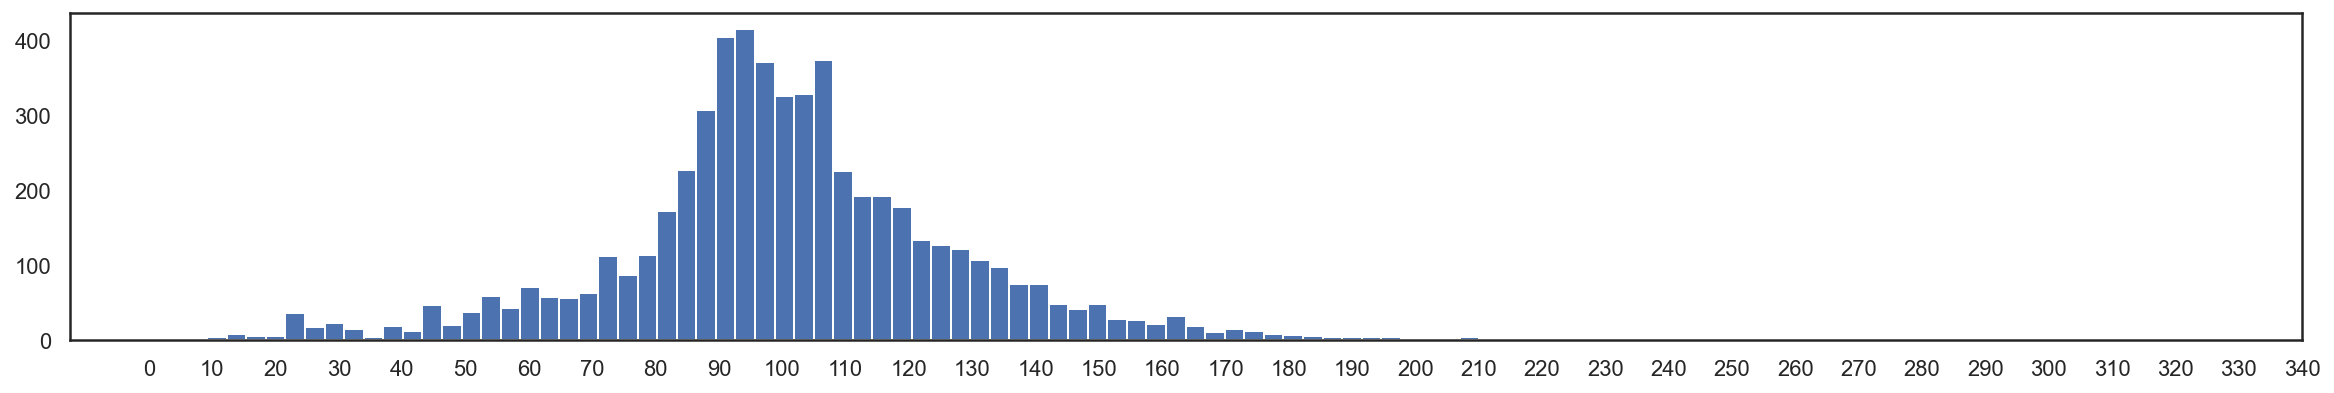

In [25]:
plt.figure(figsize=(20, 3))
plt.hist(movie_df["running_time"], bins=100)
plt.xticks(range(0, 350, 10))
plt.show()

결론 : 영화의 러닝타임은 90분에서 110분 사이의 영화가 가장 많다.

#### 영화의 컨텐츠 제작년도와 러닝타임의 상관관계
- 가설 : 최신영화일수록 러닝타임을 길어질 것이다.

In [26]:
np.corrcoef(movie_df["release_year"], movie_df["running_time"])[0, 1]

-0.19637830442743068

In [27]:
df = movie_df[["release_year", "running_time"]].sort_values("release_year").reset_index(drop=True)
df.tail(2)

,release_year,running_time
5685,2021,95
5686,2021,97


In [28]:
from sklearn.preprocessing import minmax_scale

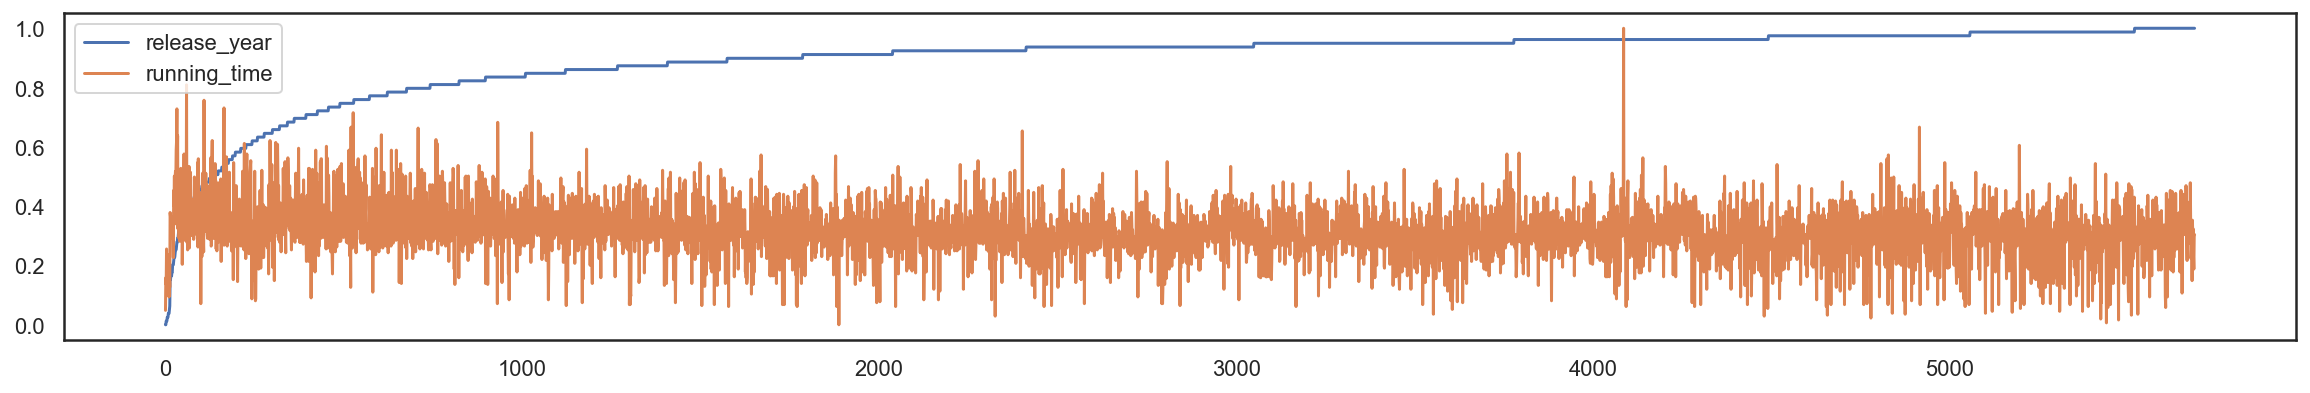

In [29]:
plt.figure(figsize=(20, 3))
plt.plot(minmax_scale(df["release_year"]), label="release_year")
plt.plot(minmax_scale(df["running_time"]), label="running_time")
plt.legend()
plt.show()

결론 : "최신영화일수록 러닝타임이 길어질 것이다" 라는 가설과 다르게 년도가 증가할수록 러닝타임은 조금씩 짧아지는 경향이 있다. (상관계수 : -0.196)

#### 국가별 평균 영화 러닝타임
- 가설 : 인도의 볼리우드 영화들은 중간중간 뮤지컬적이 요소가 많이 대체로 영화들의 러닝타임이 길기 때문에 인도 영화가 가장 긴 러닝타임을 가질것이다.

In [30]:
# 컨텐츠 제작수 상위 8개 국가
countries = country_count_df["country"].values
countries

array(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico'], dtype=object)

In [31]:
df = movie_df[movie_df["country"].isin(countries)]
df = df.reset_index(drop=True)
df.tail(2)

,type,title,country,duration,date_added,rating,release_year,year_added,month_added,target_age,running_time
3633,Movie,Zoom,United States,88 min,"January 11, 2020",PG,2006,2020,January,Older Kids,88
3634,Movie,Zubaan,India,111 min,"March 2, 2019",TV-14,2015,2019,March,Teens,111


In [32]:
result_df = np.round(df[["country", "running_time"]].groupby("country").agg("mean")).reset_index()
result_df = result_df.sort_values("running_time", ascending=False)
result_df = result_df.reset_index(drop=True)
result_df

,country,running_time
0,India,127.0
1,South Korea,117.0
2,Spain,100.0
3,Japan,98.0
4,France,93.0
5,United States,91.0
6,Mexico,88.0
7,United Kingdom,85.0
8,Canada,83.0


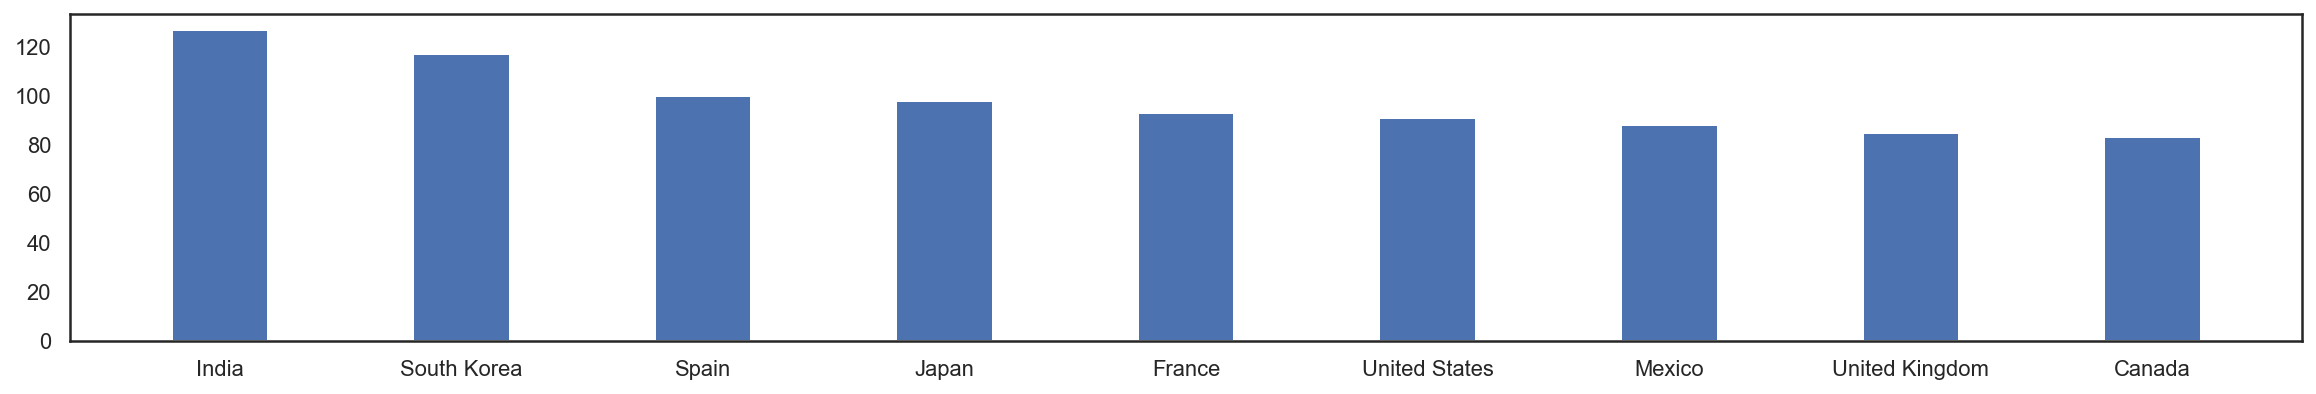

In [33]:
plt.figure(figsize=(20, 3))
plt.bar(result_df["country"], result_df["running_time"], width=0.4)
plt.show()

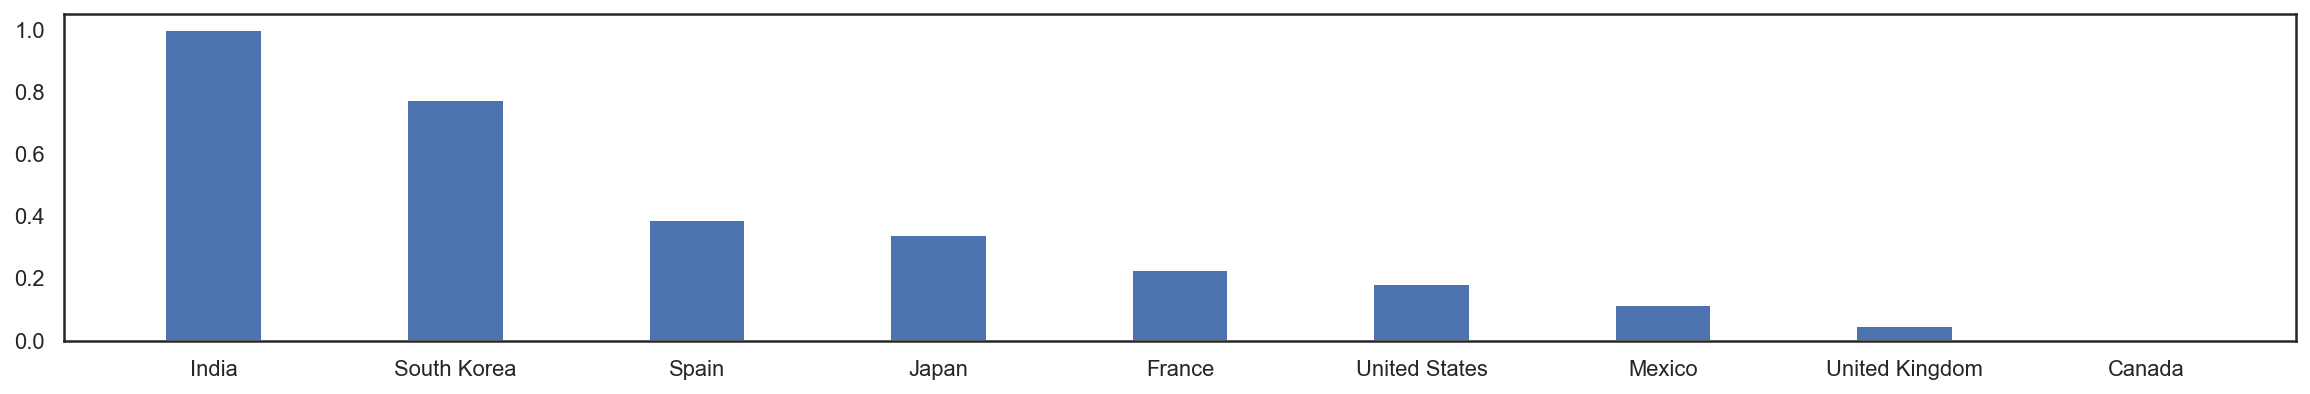

In [34]:
# 차이를 확연하게 비교하기 위해 스케일링을 해서 결과를 확인
plt.figure(figsize=(20, 3))
plt.bar(result_df["country"], minmax_scale(result_df["running_time"]), width=0.4)
plt.show()

결론 : 가설대로 인도영화의 러닝타임이 가장 길다.

#### 어떤 국가가 퀄리티 좋은 영화를 만들까?
- 가설 : 영화를 많이 만든다고 해서 퀄리티가 좋은 영화를 만드는것은 아니다.

In [34]:
neflix_df_2020.tail(2)

,title,points,countries,days
174,Bombshell,181,2,14
175,Man on a Ledge,174,4,13


In [35]:
netflix_df.tail(2)

,type,title,country,duration,date_added,rating,release_year,year_added,month_added,target_age
8805,Movie,Zoom,United States,88 min,"January 11, 2020",PG,2006,2020,January,Older Kids
8806,Movie,Zubaan,India,111 min,"March 2, 2019",TV-14,2015,2019,March,Teens


In [36]:
len(netflix_df), len(neflix_df_2020), len(neflix_df_2021)

(7961, 176, 176)

In [36]:
# 2020년과 2021년 데이터를 결합
netflix_point_df = pd.concat([neflix_df_2020, neflix_df_2021], ignore_index=True)

# object 데이터 타입인 points를 int로 형변환
netflix_point_df["points"] = netflix_point_df["points"]\
.apply(lambda data: data.replace(",", "")).astype("int")

# 2020년과 2021년 둘다 있는 영화의 경우 points와 days를 합쳐서 결합
netflix_point_df = netflix_point_df.groupby("title").agg("sum")\
.reset_index()[["title", "points", "days"]]

netflix_point_df.tail(2)

,title,points,days
174,Yara,7474,34
175,Yes Day,25618,132


In [37]:
df = pd.merge(netflix_df, netflix_point_df, on="title")
df.tail(2)

,type,title,country,duration,date_added,rating,release_year,year_added,month_added,target_age,points,days
63,Movie,The Croods,United States,99 min,"July 29, 2019",PG,2013,2019,July,Older Kids,8494,104
64,Movie,The Secret Life of Pets 2,"United States, France, Japan",86 min,"December 27, 2019",PG,2019,2019,December,Older Kids,16322,644


In [38]:
# 제목의 특수문자, 대소문자, 공백이 약간 다른 문제로 결합되지 않는 데이터가 있을것이다.
# 제목을 대소문자와 숫자만 있는 제목 컬럼을 만들어 merge를 수행

In [39]:
import re

In [40]:
netflix_df["title_join"] = netflix_df["title"].apply(lambda title: ""\
.join(re.findall("[a-zA-Z0-9]", title)).lower())
netflix_point_df["title_join"] = netflix_point_df["title"]\
.apply(lambda title: "".join(re.findall("[a-zA-Z0-9]", title)).lower())

In [41]:
df = pd.merge(netflix_df, netflix_point_df, on="title_join")
df.tail(2)

,type,title_x,country,duration,date_added,rating,release_year,year_added,month_added,target_age,title_join,title_y,points,days
70,Movie,The Croods,United States,99 min,"July 29, 2019",PG,2013,2019,July,Older Kids,thecroods,The Croods,8494,104
71,Movie,The Secret Life of Pets 2,"United States, France, Japan",86 min,"December 27, 2019",PG,2019,2019,December,Older Kids,thesecretlifeofpets2,The Secret Life of Pets 2,16322,644


In [42]:
# 특수문자나 대소문자 구분으로 merge되지 않는 데이터가 13개가 있었다.
# 156개의 데이터에 rank, points, days, countries 데이터가 추가되었다.
# 분석에 필요한"country", "points", "days" 컬럼만 남기자.

In [43]:
filtered_df = df[["country", "points", "days"]]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df.tail(2)

,country,points,days
70,United States,8494,104
71,"United States, France, Japan",16322,644


In [44]:
filtered_df.dtypes

country    object
points      int32
days        int64
dtype: object

In [45]:
filtered_df["point_per_days"] = np.round(filtered_df["points"] / filtered_df["days"])
filtered_df.tail(2)

,country,points,days,point_per_days
70,United States,8494,104,82.0
71,"United States, France, Japan",16322,644,25.0


In [48]:
# 국가별 평균
groupby_df = filtered_df.groupby("country").agg("mean").reset_index()
groupby_df = groupby_df[["country", "point_per_days"]]
groupby_df["point_per_days"] = groupby_df["point_per_days"].astype("int")
groupby_df = groupby_df.sort_values("point_per_days", ascending=False)
groupby_df = groupby_df.reset_index(drop=True)
groupby_df.head()

,country,point_per_days
0,"Italy, Brazil, Greece",298
1,"Canada, Hungary, United States",281
2,"United Kingdom, United States",269
3,"Hungary, United States",259
4,Brazil,237


In [49]:
# 독자적으로 만든 영화만 평가 > 여러국가가 협력해서 만든 영화는 제외

In [50]:
drop_index = groupby_df[groupby_df["country"].str.contains(",")].index
drop_index

Int64Index([0, 1, 2, 3, 5, 11, 12, 14, 16, 17, 19, 24, 25, 29], dtype='int64')

In [51]:
result_df = groupby_df.drop(index=drop_index).reset_index(drop=True)
result_df.tail(3)

,country,point_per_days
14,China,80
15,India,79
16,New Zealand,13


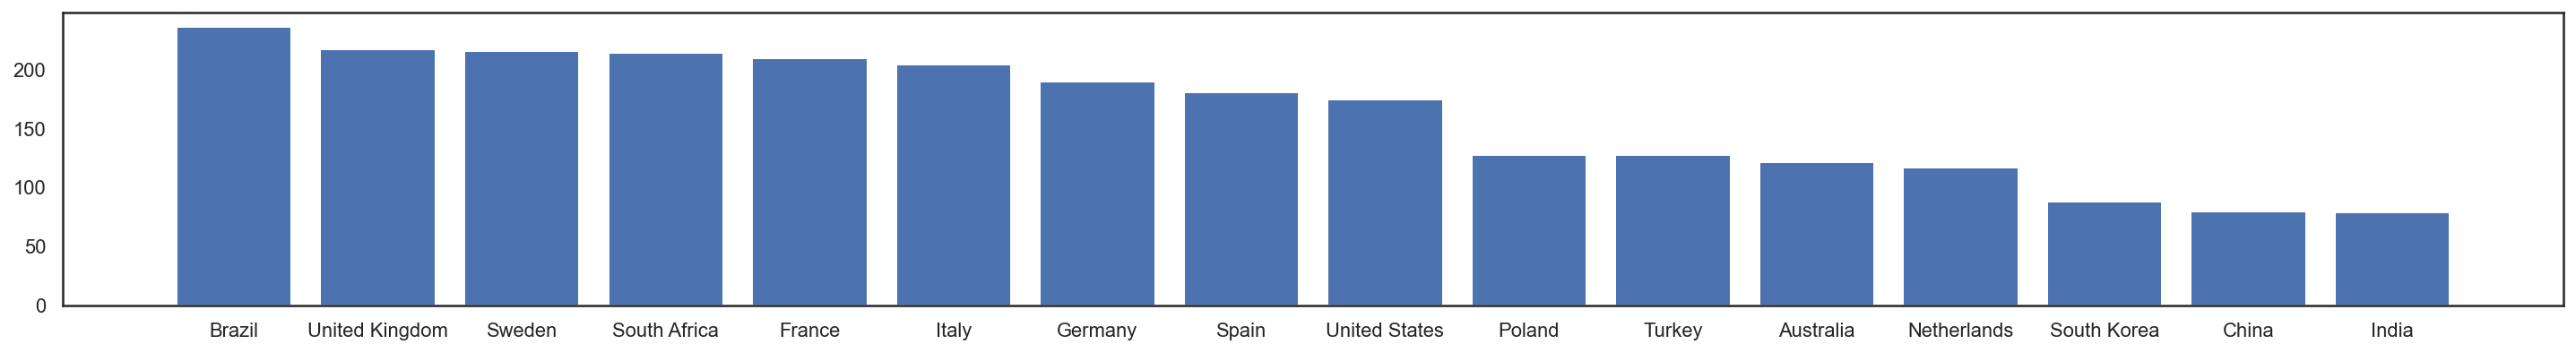

In [52]:
plt.figure(figsize=(25, 3))
plt.bar(result_df["country"][:16], result_df["point_per_days"][:16])
plt.show()

결론 : 컨텐츠를 가장 많이 제작하는것은 미국이지만 컨텐츠의 퀄리티는 브라질이 가장 좋다.

#### 많은 국가에서 상영되면 포인트를 더 잘 받을까?
- 가설 : 많은 국가에서 컨텐츠를 볼수 있으면 더 좋은 포인트를 얻을것이다.

In [54]:
netflix_point_df = pd.concat([neflix_df_2020, neflix_df_2021], ignore_index=True)
netflix_point_df["points"] = netflix_point_df["points"].apply(lambda data: data.replace(",", "")).astype("int")
netflix_point_df = netflix_point_df[netflix_point_df["days"] != 0]
netflix_point_df["points_per_days"] = np.round(netflix_point_df["points"] / netflix_point_df["days"])
netflix_point_df = netflix_point_df[["points_per_days", "countries"]]
netflix_point_df = netflix_point_df.sort_values("points_per_days")
netflix_point_df = netflix_point_df.reset_index(drop=True)
netflix_point_df.tail()

,points_per_days,countries
347,540.0,90
348,673.0,89
349,673.0,89
350,886.0,89
351,886.0,89


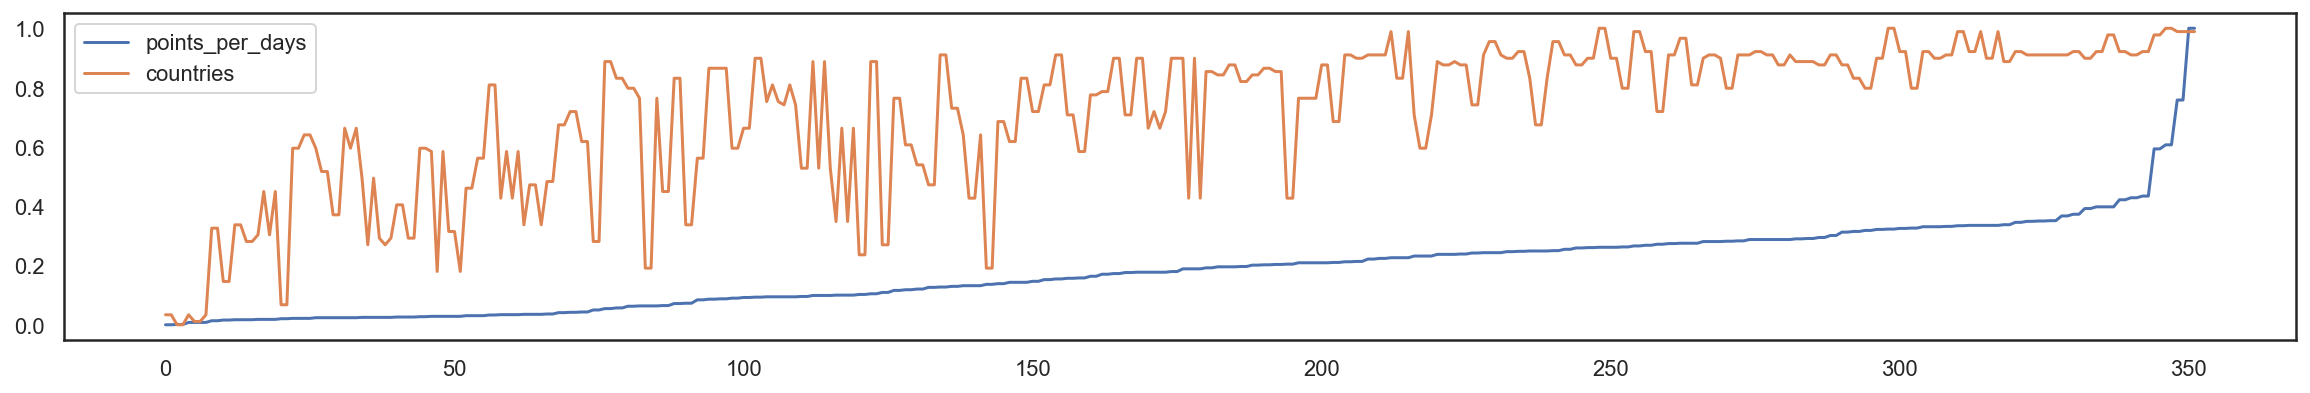

In [55]:
plt.figure(figsize=(20, 3))
plt.plot(minmax_scale(netflix_point_df["points_per_days"]), label="points_per_days")
plt.plot(minmax_scale(netflix_point_df["countries"]) , label="countries")
plt.legend()
plt.show()

In [56]:
netflix_point_df.corr().values[0, 1]

0.6723471785419178

결론 : 가설과 같이 많은 국가에서 컨텐츠가 상영되는것이 더 많은 포인트를 받을수 있다.